<a href="https://colab.research.google.com/github/provincit/colab_public/blob/main/Boston_Housing_dataset_with_statmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use("seaborn")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
rawBostonData = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv")

In [3]:
rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
rawBostonData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Drop missing value

In [5]:
rawBostonData.dropna(inplace=True)

In [6]:
rawBostonData.drop_duplicates(inplace=True)

In [7]:
list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [8]:
boston_df = rawBostonData.rename(columns={
  'CRIM': 'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ': 'non-retailLandProptn',
 'CHAS': 'riverDummy',
 'NOX': 'nitrixOxide_pp10m',
 'RM': 'AvgNo.RoomsPerDwelling',
 'AGE': 'ProptnOwnerOccupied',
 'DIS': 'weightedDist',
 'RAD': 'radialHighwayAccess',
 'TAX': 'propTaxRate_per10K',
 'PTRATIO': 'pupilTeacherRatio',
 'LSTAT': 'pctLowerStatus',
 'MEDV': 'medianValue_Ks'
})

In [9]:
boston_df.head()

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwayAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwayAccess     506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [11]:
boston_df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwayAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
X = boston_df.drop('crimeRatePerCapita', axis=1)
y = boston_df[['crimeRatePerCapita']]

seed = 69

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = seed)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)



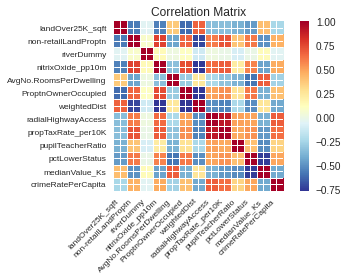

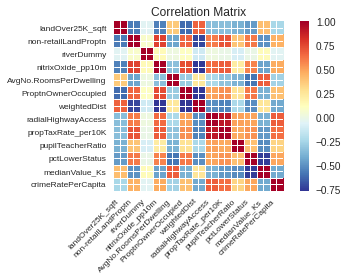

In [13]:
corrMatrix = train_data.corr(method = 'pearson')
xnames = list(train_data.columns)
ynames = list(train_data.columns)

plot_corr(corrMatrix, xnames=xnames, ynames=ynames, title=None, normcolor=False, cmap='RdYlBu_r')

In [14]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
train_data.corr(method=histogram_intersection)

,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwayAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
landOver25K_sqft,1.0,438.6,4.0,43.7,650.7,2408.0,591.2,431.0,4369.0,1606.7,673.9,2476.7,12.5
non-retailLandProptn,438.6,1.0,24.0,197.5,1888.7,3997.5,1077.7,2814.0,4010.2,3828.9,3405.9,3459.6,1079.8
riverDummy,4.0,24.0,1.0,14.9,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,15.1
nitrixOxide_pp10m,43.7,197.5,14.9,1.0,197.5,197.5,197.5,197.5,197.5,197.5,197.5,197.5,125.5
AvgNo.RoomsPerDwelling,650.7,1888.7,24.0,197.5,1.0,2214.8,1255.0,1718.2,2218.8,2218.8,2035.4,2217.3,646.7
ProptnOwnerOccupied,2408.0,3997.5,24.0,197.5,2214.8,1.0,1318.6,3521.7,24334.0,6376.3,4502.5,7414.1,1277.2
weightedDist,591.2,1077.7,24.0,197.5,1255.0,1318.6,1.0,1058.6,1324.0,1324.0,1210.5,1324.0,285.6
radialHighwayAccess,431.0,2814.0,24.0,197.5,1718.2,3521.7,1058.6,1.0,3522.0,3145.8,2844.7,2664.3,1151.8
propTaxRate_per10K,4369.0,4010.2,24.0,197.5,2218.8,24334.0,1324.0,3522.0,1.0,6522.7,4525.3,7977.8,1277.2
pupilTeacherRatio,1606.7,3828.9,24.0,197.5,2218.8,6376.3,1324.0,3145.8,6522.7,1.0,4186.3,5830.9,1109.0


In [15]:
train_data.corr()

,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwayAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
landOver25K_sqft,1.000000,-0.562571,-0.048798,-0.548963,0.365862,-0.610857,0.678672,-0.339223,-0.343067,-0.389770,-0.463993,0.407794,-0.236489
non-retailLandProptn,-0.562571,1.000000,0.079779,0.766088,-0.434372,0.665755,-0.711972,0.606424,0.714781,0.385958,0.612510,-0.496070,0.453536
riverDummy,-0.048798,0.079779,1.000000,0.143541,0.013279,0.104866,-0.115908,0.014235,-0.003714,-0.087890,-0.005585,0.133650,-0.044962
nitrixOxide_pp10m,-0.548963,0.766088,0.143541,1.000000,-0.334996,0.735327,-0.765733,0.649731,0.692677,0.224301,0.584575,-0.440244,0.474700
AvgNo.RoomsPerDwelling,0.365862,-0.434372,0.013279,-0.334996,1.000000,-0.284150,0.245083,-0.234598,-0.321984,-0.381679,-0.586945,0.689031,-0.260712
ProptnOwnerOccupied,-0.610857,0.665755,0.104866,0.735327,-0.284150,1.000000,-0.766614,0.500600,0.545904,0.270198,0.610490,-0.392566,0.403588
weightedDist,0.678672,-0.711972,-0.115908,-0.765733,0.245083,-0.766614,1.000000,-0.508200,-0.542109,-0.232931,-0.507020,0.260350,-0.416311
radialHighwayAccess,-0.339223,0.606424,0.014235,0.649731,-0.234598,0.500600,-0.508200,1.000000,0.913248,0.500530,0.494723,-0.393203,0.683325
propTaxRate_per10K,-0.343067,0.714781,-0.003714,0.692677,-0.321984,0.545904,-0.542109,0.913248,1.000000,0.480542,0.544172,-0.476099,0.635387
pupilTeacherRatio,-0.389770,0.385958,-0.087890,0.224301,-0.381679,0.270198,-0.232931,0.500530,0.480542,1.000000,0.400826,-0.511468,0.335682


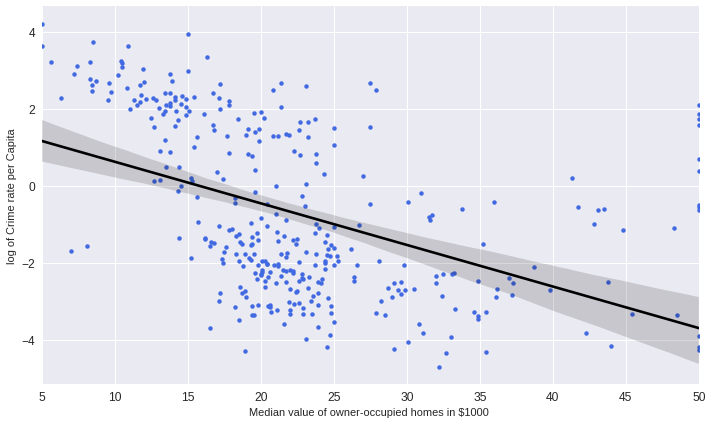

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax, color='k', scatter_kws={"s":20, "color": "royalblue", "alpha":1})

ax.set_ylabel('log of Crime rate per Capita')
ax.set_xlabel('Median value of owner-occupied homes in $1000 ')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

In [17]:
linearModel = smf.ols(formula='crimeRatePerCapita ~ medianValue_Ks', data=train_data)

In [18]:
linearModelResult = linearModel.fit()


In [19]:
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     75.92
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.17e-16
Time:                        10:03:30   Log-Likelihood:                -1182.4
No. Observations:                 354   AIC:                             2369.
Df Residuals:                     352   BIC:                             2377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2850      0.953     11.

In [20]:
multiLinearModel = smf.ols(formula='crimeRatePerCapita ~ pctLowerStatus + radialHighwayAccess + medianValue_Ks + nitrixOxide_pp10m', data=train_data)

In [21]:
multiLinearModelResult = multiLinearModel.fit()
print(multiLinearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     87.77
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.55e-51
Time:                        10:03:30   Log-Likelihood:                -1093.7
No. Observations:                 354   AIC:                             2197.
Df Residuals:                     349   BIC:                             2217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0307    